In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
# sys.path.append(os.path.abspath("../model_utils"))
sys.path.append(os.path.abspath("../classificador"))
sys.path.append(os.path.abspath("../evaluacion"))

import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

import torch

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
classifier_model = torch.load('../classificador/1711206440837-resnext29_8_64_sgd_plateau_bs96_lr1.0e-02_wd1.0e-03-best-loss.pth', map_location=device)
classifier_model.eval();

In [44]:
# classifier_model

In [ ]:
import utils_fid as uf


gen_data, gen_paths = uf.get_embedding(classifier_model, '../data/embedding', class_c='BOAFAB_GENERATED', sample_size=1000, batch_processing=2)
real_data, real_paths = uf.get_embedding(classifier_model, '../data/embedding', class_c='BOAFAB_REAL', sample_size=1000)

In [5]:
fid_score = uf.calculate_fid(real_data, gen_data)
fid_score


116.7889120737893

In [5]:
data = np.vstack((
    real_data,
    gen_data
))
grouper = ['Real'] * len(real_data) + ['Generated'] * len(gen_data)
scaled_real_data = scale(data)

dim_new_dimension = 2

pca = PCA(n_components=dim_new_dimension)
pca.fit(scaled_real_data)

data_transformed = pca.transform(scaled_real_data)

c:\Users\snung\miniconda3\envs\myenv\Lib\site-packages\sklearn\preprocessing\_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\snung\miniconda3\envs\myenv\Lib\site-packages\sklearn\preprocessing\_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


----
Incluir datos de Data Augementation

In [8]:
aug_data, aug_paths = uf.get_embedding(classifier_model, '../data/embedding', class_c='BOAFAB_DATA_AUG', sample_size=1000)


100%|█████████▉| 999/1.00k [01:35<00:00, 10.4audios/s] 


In [9]:
fid_score = uf.calculate_fid(real_data, aug_data)
fid_score


6.165147869723681

In [10]:
data = np.vstack((
    real_data,
    gen_data,
    aug_data
))
grouper = ['Real'] * len(real_data) + ['Generated'] * len(gen_data)\
    + ['DATA_AUG'] * len(aug_data)
scaled_real_data = scale(data)

dim_new_dimension = 2

pca = PCA(n_components=dim_new_dimension)
pca.fit(scaled_real_data)

data_transformed = pca.transform(scaled_real_data)

c:\Users\snung\miniconda3\envs\myenv\Lib\site-packages\sklearn\preprocessing\_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\snung\miniconda3\envs\myenv\Lib\site-packages\sklearn\preprocessing\_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


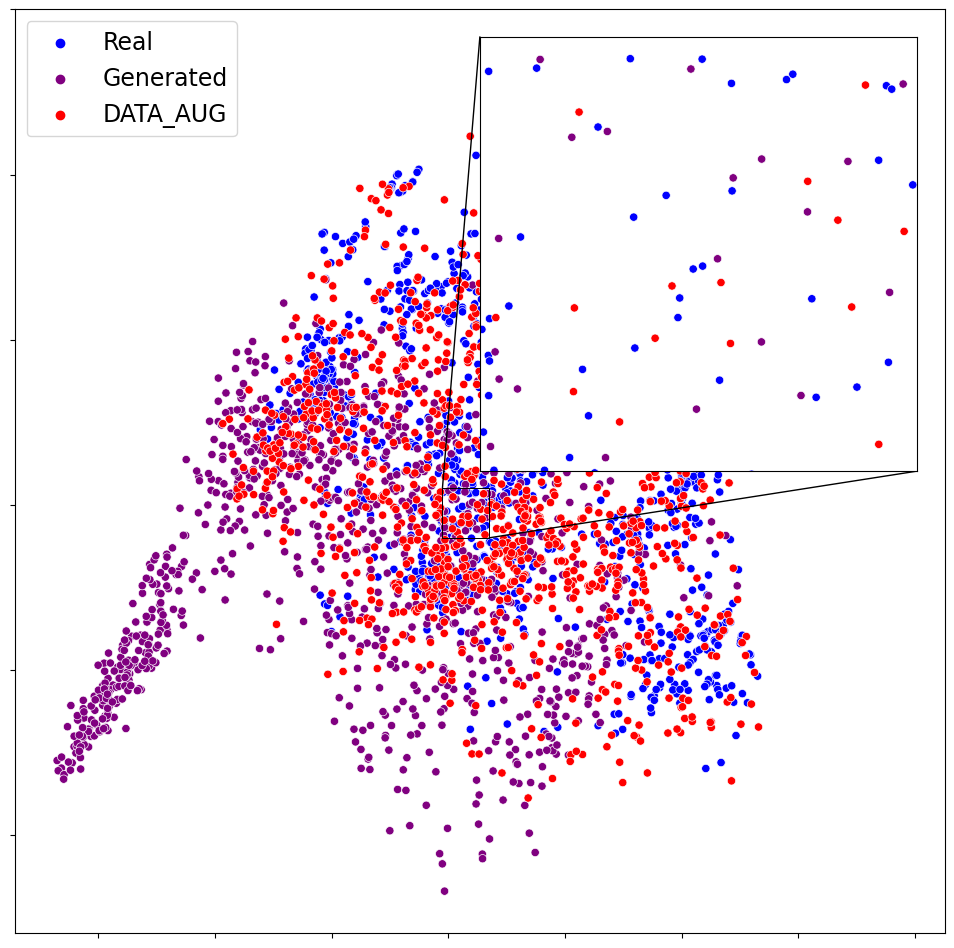

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.scatterplot(
    x=data_transformed[:, 0],
    y=data_transformed[:, 1],
    hue=grouper,
    palette=['blue', 'purple', 'red'],
    ax=ax
)
x1, x2, y1, y2 = -1, 7, -2, 1  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.5, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])

# # Add labels from the 'labels' column
# for i, (x, y) in enumerate(data_transformed):
#     plt.text(x, y, i, fontsize=10)



sns.scatterplot(
    x=data_transformed[:, 0],
    y=data_transformed[:, 1],
    hue=grouper,
    palette=['blue', 'purple', 'red'],
    ax=axins
)
ax.indicate_inset_zoom(axins,  edgecolor="black", alpha=1,lw=0.7)
axins.get_legend().set_visible(False)

axins.set_xticks([])
axins.set_yticks([])
ax.legend(fontsize=17)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

------

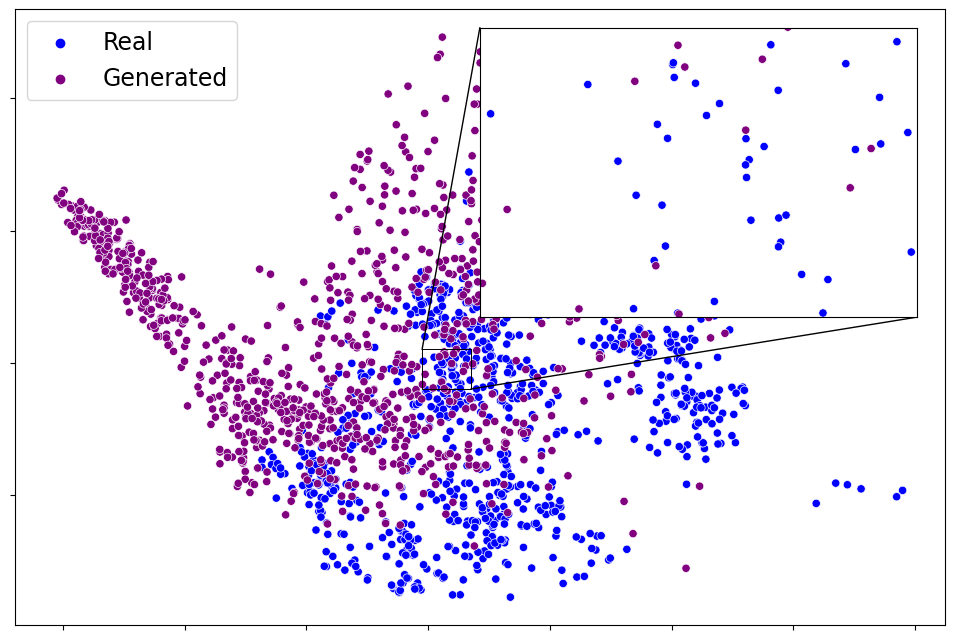

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    x=data_transformed[:, 0],
    y=data_transformed[:, 1],
    hue=grouper,
    palette=['blue', 'purple'],
    ax=ax
)
x1, x2, y1, y2 = -1, 7, -2, 1  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.5, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])

# # Add labels from the 'labels' column
# for i, (x, y) in enumerate(data_transformed):
#     plt.text(x, y, i, fontsize=10)



sns.scatterplot(
    x=data_transformed[:, 0],
    y=data_transformed[:, 1],
    hue=grouper,
    palette=['blue', 'purple'],
    ax=axins
)
ax.indicate_inset_zoom(axins,  edgecolor="black", alpha=1,lw=0.7)
axins.get_legend().set_visible(False)

axins.set_xticks([])
axins.set_yticks([])
ax.legend(fontsize=17)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [7]:
import pandas as pd
import plotly.express as px

df_audios = pd.DataFrame(data_transformed, columns=['x', 'y'])
df_audios['num'] = df_audios.index
df_audios['type'] = grouper

fig = px.scatter(df_audios, x="x", y="y", color="type", hover_name='num', color_discrete_sequence=['blue', 'purple'])

fig.show()


In [8]:
import librosa
paths = real_paths + gen_paths
def load_audio(path, verbose=False):
    audio, sr = librosa.load(path, sr=16_000)

    return audio, sr

In [9]:
from IPython.display import Audio

load_path = paths[470]
print(load_path)
audio, sr = load_audio(load_path)

Audio(data=audio, rate=16_000)

../data/embedding\BOAFAB_REAL\470.wav


In [63]:
px.scatter?

Signature:
px.scatter(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    symbol=None,
    size=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    symbol_sequence=None,
    symbol_map=None,
    opacity=None,
    size_max=None,
    marginal_x=None,
    marginal_y=None,
    trendline=None,
    trendline_options=None,
    trendline_color_override=None,
    trendline_scope='trace',
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    render_mode='auto',


In [42]:
ax.indicate_inset_zoom?

Signature: ax.indicate_inset_zoom(inset_ax, **kwargs)
Docstring:
Add an inset indicator rectangle to the Axes based on the axis
limits for an *inset_ax* and draw connectors between *inset_ax*
and the rectangle.

Warnings
--------
This method is experimental as of 3.0, and the API may change.

Parameters
----------
inset_ax : `.Axes`
    Inset Axes to draw connecting lines to.  Two lines are
    drawn connecting the indicator box to the inset Axes on corners
    chosen so as to not overlap with the indicator box.

**kwargs
    Other keyword arguments are passed on to `.Axes.indicate_inset`

Returns
-------
rectangle_patch : `.patches.Rectangle`
     Rectangle artist.

connector_lines : 4-tuple of `.patches.ConnectionPatch`
    Each of four connector lines coming from the rectangle drawn on
    this axis, in the order lower left, upper left, lower right,
    upper right.
    Two are set with visibility to *False*,  but the user can
    set the visibility to *True* if the automatic choice

In [26]:
# import numpy as np

# from matplotlib import cbook
# from matplotlib import pyplot as plt

# fig, ax = plt.subplots()

# # make data
# Z = cbook.get_sample_data("axes_grid/bivariate_normal.npy")  # 15x15 array
# Z2 = np.zeros((150, 150))
# ny, nx = Z.shape
# Z2[30:30+ny, 30:30+nx] = Z
# extent = (-3, 4, -4, 3)

# ax.imshow(Z2, extent=extent, origin="lower")

# # inset axes....
# x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9  # subregion of the original image
# axins = ax.inset_axes(
#     [0.5, 0.5, 0.47, 0.47],
#     xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
# axins.imshow(Z2, extent=extent, origin="lower")

# ax.indicate_inset_zoom(axins, edgecolor="black")

# plt.show()